# Embedded ML Lab - Challenge (testing yolo example)

This is an example of inference with the VOC data set and tinyyolov2. There are pretrained weights (`voc_pretrained.pt`) stored that can be loaded into the model.

In [1]:
import torch

from utils.dataloader import VOCDataLoaderPerson
loader = VOCDataLoaderPerson(train=False, batch_size=1, shuffle=True)

/home/artemis/.local/lib/python3.12/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artemis/.local/lib/python3.12/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from models.my_tinyyolov2 import MyTinyYoloV2
from utils.yolo import nms, filter_boxes
from utils.viz import display_result

# make an instance with 20 classes as output
net = MyTinyYoloV2(num_classes=1)

# load pretrained weights
sd = torch.load("models/configs/voc_fused2.pt")
net.load_state_dict(sd)

#put network in evaluation mode
net.eval()

MyTinyYoloV2(
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(1024, 30, kernel_size=(1, 1), stride=(1, 1))
)

  0%|                                                                                                          | 0/2232 [00:00<?, ?it/s]

tensor([[ 0.9850,  0.7850,  0.0300,  0.1160,  1.0000,  0.0000],
        [ 0.5570,  0.6790,  0.0620,  0.1480,  1.0000,  0.0000],
        [ 0.4770,  0.8120,  0.0780,  0.1260,  1.0000,  0.0000],
        [ 0.7090,  0.6630,  0.0740,  0.1600,  1.0000,  0.0000],
        [ 0.4290,  0.6750,  0.0740,  0.1640,  1.0000,  0.0000],
        [ 0.6430,  0.6730,  0.0820,  0.1720,  1.0000,  0.0000],
        [ 0.0570,  0.7830,  0.0820,  0.1840,  1.0000,  0.0000],
        [ 0.8740,  0.6950,  0.1240,  0.1720,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


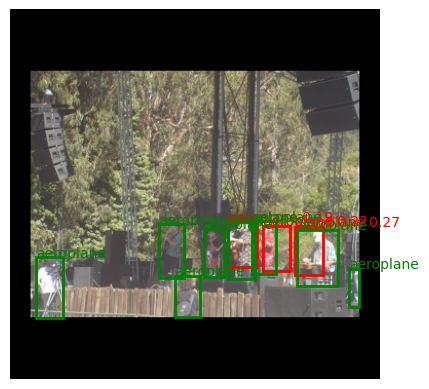

  0%|                                                                                                  | 1/2232 [00:00<06:01,  6.17it/s]

tensor([[ 0.3010,  0.3520,  0.1060,  0.2420,  1.0000,  0.0000],
        [ 0.8910,  0.3260,  0.2180,  0.3980,  1.0000,  0.0000],
        [ 0.0950,  0.4010,  0.1860,  0.5480,  1.0000,  0.0000],
        [ 0.5440,  0.4460,  0.7400,  0.4380,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


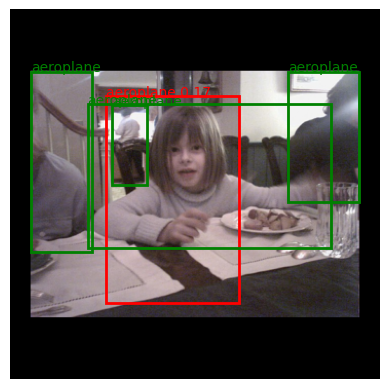

  0%|                                                                                                  | 2/2232 [00:00<05:57,  6.24it/s]

tensor([[ 0.0170,  0.3970,  0.0300,  0.1160,  1.0000,  0.0000],
        [ 0.0650,  0.3940,  0.0460,  0.1180,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


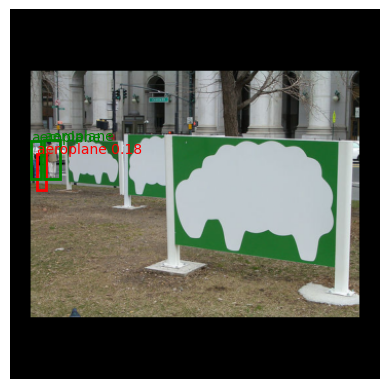

  0%|▏                                                                                                 | 3/2232 [00:00<05:30,  6.75it/s]

tensor([[ 0.2840,  0.5010,  0.5640,  0.7480,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


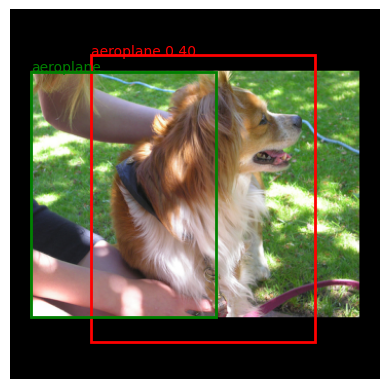

  0%|▏                                                                                                 | 4/2232 [00:00<06:40,  5.56it/s]

tensor([[ 0.7630,  0.5450,  0.4740,  0.6600,  1.0000,  0.0000],
        [ 0.3530,  0.5880,  0.7020,  0.5740,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


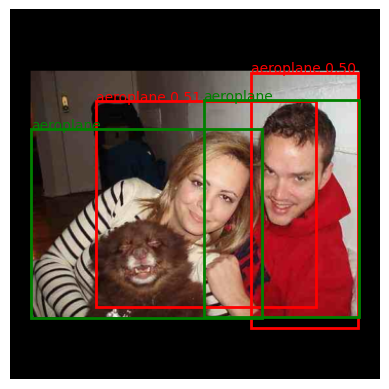

  0%|▏                                                                                                 | 5/2232 [00:00<05:51,  6.33it/s]

tensor([[ 0.4410,  0.5166,  0.8780,  0.4560,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


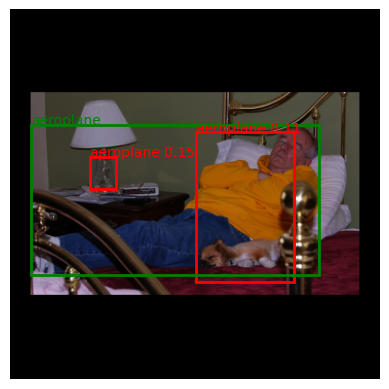

  0%|▎                                                                                                 | 6/2232 [00:00<05:39,  6.56it/s]

tensor([[ 0.6870,  0.5170,  0.3580,  0.6640,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


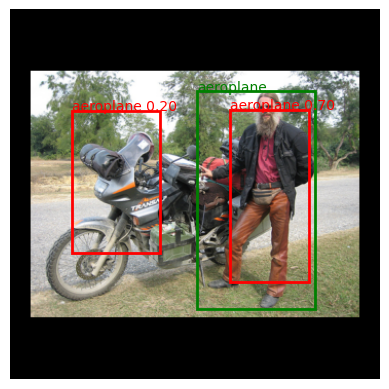

  0%|▎                                                                                                 | 7/2232 [00:01<05:20,  6.94it/s]

tensor([[ 0.4604,  0.5010,  0.6980,  0.9980,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


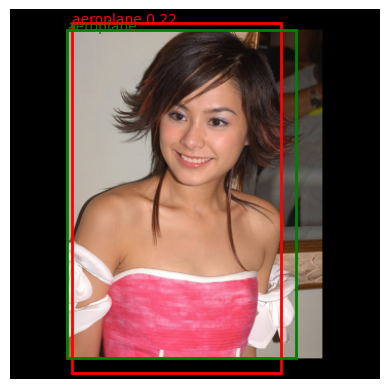

  0%|▎                                                                                                 | 8/2232 [00:01<05:15,  7.05it/s]

tensor([[ 0.2700,  0.4930,  0.2520,  0.5600,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


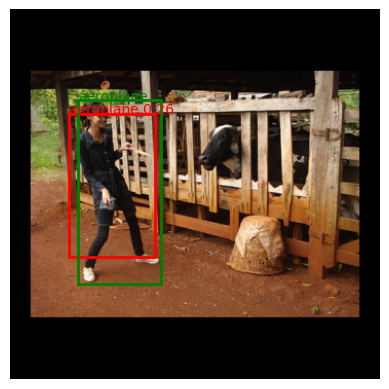

  0%|▍                                                                                                 | 9/2232 [00:01<05:12,  7.11it/s]

tensor([[ 0.1960,  0.1860,  0.3880,  0.1180,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


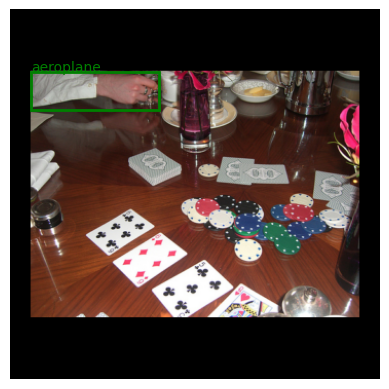

  0%|▍                                                                                                | 10/2232 [00:01<05:14,  7.07it/s]

tensor([[ 0.4855,  0.6250,  0.1674,  0.5000,  1.0000,  0.0000],
        [ 0.6451,  0.6328,  0.2634,  0.4844,  1.0000,  0.0000],
        [ 0.2846,  0.5871,  0.3504,  0.5000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


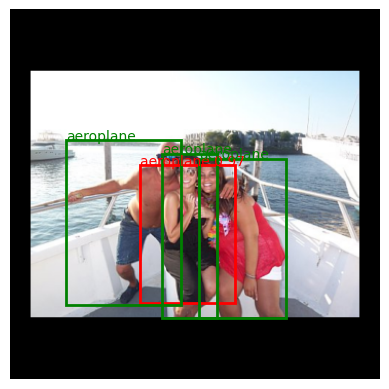

  0%|▍                                                                                                | 11/2232 [00:01<05:05,  7.26it/s]

tensor([[ 0.2010,  0.5558,  0.1940,  0.6000,  1.0000,  0.0000],
        [ 0.7790,  0.6618,  0.4380,  0.3880,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


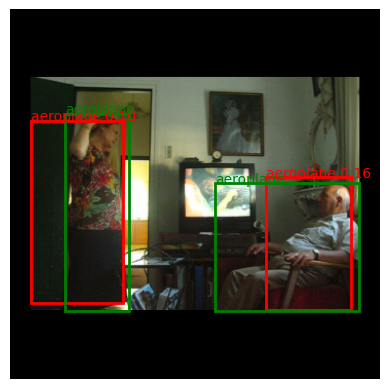

  1%|▌                                                                                                | 12/2232 [00:01<05:11,  7.13it/s]

tensor([[ 0.2510,  0.5810,  0.4980,  0.5880,  1.0000,  0.0000],
        [ 0.7150,  0.5620,  0.5700,  0.6260,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


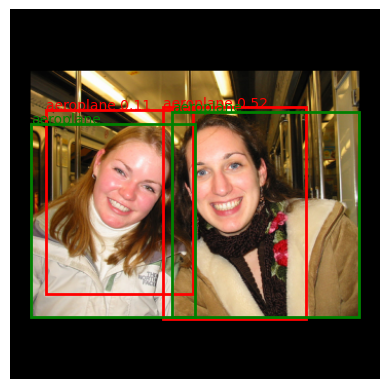

  1%|▌                                                                                                | 13/2232 [00:01<05:14,  7.05it/s]

tensor([[ 0.3390,  0.5017,  0.6740,  0.6620,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


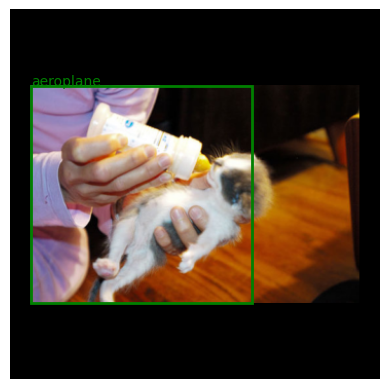

  1%|▌                                                                                                | 14/2232 [00:02<05:05,  7.26it/s]

tensor([[ 0.6820,  0.5310,  0.4400,  0.6880,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.0000]])


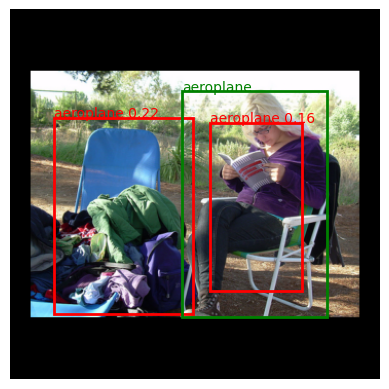

  1%|▋                                                                                                | 15/2232 [00:02<05:22,  6.88it/s]


KeyboardInterrupt: 

In [4]:
import tqdm
for idx, (input, target) in tqdm.tqdm(enumerate(loader), total=len(loader)):
    
    #input is a 1 x 3 x 320 x 320 image
    output = net(input)
    "output is of a tensor of size 32 x 125 x 10 x 10"
    #output is a 32 x 125 x 10 x 10 tensor
    
    #filter boxes based on confidence score (class_score*confidence)
    output = filter_boxes(output, 0.1)
    
    #filter boxes based on overlap
    output = nms(output, 0.25)
    print(target[0])
    
    display_result(input, output, target, file_path='yolo_prediction.png')